# Homework 6

# Task 1 (5% credit) 
Provide a definition for the concept of a conjugate prior given the Bayesian learning model. What is the conjugate prior for the univariate linear regression $y\sim {\cal N}(wx,\sigma^2)$ with a fixed $\sigma$?

#### A1:
In Bayesian probability theory, if the posterior distributions p(θ|x) are in the same family as the prior probability distribution p(θ), the prior and posterior are then called conjugate distributions, and the prior is called a conjugate prior for the likelihood function. 
For the univariate linear regression, the conjugate propr is a normal distribution.

https://en.wikipedia.org/wiki/Conjugate_prior

# Task 2 (5% credit). 
Which prior in the Bayesian linear regression framework leads to: a) Ridge regression, b) Lasso regression?


#### A2:
a) a multivatiate linear regression model $y\sim {\cal N}(w^T x,\sigma^2).$ leads to Ridge regression

b)the Laplacian prior distribution $p(w_j)\sim e^{-\lambda|w_j|/\sigma}$ leads to Lasso (least absolute shrinkage and selection operator) regression.


# Task 3 (10% credit). 
Answer some questions about the properties of Lasso/Ridge:

a) Which of the Lasso and Ridge regressions possess an analytic solution in the closed form?


b) Which of the Lasso and Ridge regressions often use to completely eliminate coefficients for some of the regressors?


c) Which value of $\lambda$ makes Lasso and Ridge identical to the ordinary least square regression?

d) What dataset (training, validation or test) you would use to estimate the $\lambda$ for Lasso or Ridge?

#### A3:
a)Ridge

b)Ridge

c)Small values of λ leads to the result close to OLS (identical to λ=0)

d)Validation dataset

# Task 4 (15% credit). 
Consider a Bayesian univariate linear regression $y\sim {\cal N}(wx,\sigma^2)$ with a given $\sigma=1$ and the prior $w\sim {\cal N}(5,1)$. Compute the posterior distribution after an observation $y=12,x=2$. After all, what is the probability of having $w<5$?

In [3]:
from scipy.stats import norm
import numpy as np

In [6]:
norm.cdf(5, 29/5.0, 1.0/np.sqrt(1/5.0))

0.36025739356812769

# Task 5 (20% credit). 
For the training and test sets provided below, train a linear regression of $y$ (last column) vs the rest of the columns of the table treated as regressors (intercept excluded) over the training set, apply it to the test set and report it's R2 performance over both - training and test set.

In [8]:
import pandas as pd
data_train=pd.read_csv("https://serv.cusp.nyu.edu/classes/ML_2016_Spring/session2/HW/Homework1_training.csv")
y_train=np.asarray(data_train.iloc[:,-1]) # make dependent variable
X_train=np.asarray(data_train.iloc[:,1:-2]) #make independent variables

data_test=pd.read_csv("https://serv.cusp.nyu.edu/classes/ML_2016_Spring/session2/HW/Homework1_test.csv")
y_test=np.asarray(data_test.iloc[:,-1]) # make dependent variable
X_test=np.asarray(data_test.iloc[:,1:-2]) #make independent variables


In [9]:
from scipy import stats
import statsmodels.api as sm
from sklearn import linear_model

In [19]:
lm = sm.OLS(y_train, X_train).fit()

# In the sample:
p_IS=lm.predict(X_train)
err_IS=p_IS-y_train
R_2_IS=1-np.var(err_IS)/np.var(y_train)
print("The R-squared we found for IS is: {0}".format(R_2_IS))

#lm_coef=lm.coef_
#Out of sample
p_OS=lm.predict(X_test)
err_OS=p_OS-y_test
R_2_OS=1-np.var(err_OS)/np.var(y_test)

print("The R-squared we found for OS is: {0}".format(R_2_OS))

The R-squared we found for IS is: 0.999999981157
The R-squared we found for OS is: -2.3963619339


# Task 6 (20% credit). 
Train Lasso and Ridge regressions using the training sample above with $\lambda_{Ridge}=40000$ and $\lambda_{Lasso}=40$ and report their performance over the test set.

In [20]:
lambda_l_optimal = 40
Lasso=linear_model.Lasso(fit_intercept=0,alpha=lambda_l_optimal)
#try Ridge with a selected regularization parameter lambda

Lasso.fit(X_train,y_train)
# In the sample:
p_IS=Lasso.predict(X_train)
err_IS=p_IS-y_train
R_2_IS_Lasso=1-(err_IS**2).sum()/np.var(y_train)/len(y_train)
print("The R-squared we found for IS Lasso is: {0}".format(R_2_IS_Lasso))
Lasso_coef=Lasso.coef_
#Out of sample
p_OS=Lasso.predict(X_test)
err_OS=p_OS-y_test
R_2_OS_Lasso=1-(err_OS**2).sum()/np.var(y_test)/len(y_test)
print("The R-squared we found for OS Lasso is: {0}".format(R_2_OS_Lasso))

The R-squared we found for IS Lasso is: 0.865495889738
The R-squared we found for OS Lasso is: 0.645193122988


/Users/cuichenxi/anaconda/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:479: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [21]:
lambda_l_optimal = 40000
Ridge=linear_model.Ridge(fit_intercept=0,alpha=lambda_l_optimal)
#try Ridge with a selected regularization parameter lambda

Ridge.fit(X_train,y_train)
# In the sample:
p_IS=Ridge.predict(X_train)
err_IS=p_IS-y_train
R_2_IS_Ridge=1-(err_IS**2).sum()/np.var(y_train)/len(y_train)
print("The R-squared we found for IS Lasso is: {0}".format(R_2_IS_Ridge))
#Out of sample
p_OS=Ridge.predict(X_test)
err_OS=p_OS-y_test
R_2_OS_Ridge=1-(err_OS**2).sum()/np.var(y_test)/len(y_test)
print("The R-squared we found for OS Lasso is: {0}".format(R_2_OS_Ridge))

The R-squared we found for IS Lasso is: 0.846189805288
The R-squared we found for OS Lasso is: 0.665306760162


# Task 7 (25% credit). 
For each $m=1,2,...39$ train OLS, Lasso and Ridge regressions using the training sample above with $\lambda_{Ridge}=40000$ and $\lambda_{Lasso}=40$ using the first $m$ columns of the data tables as the regressors and plot the in-sample (training) and out-of-sample (test) R2 for all three models on the same graph.

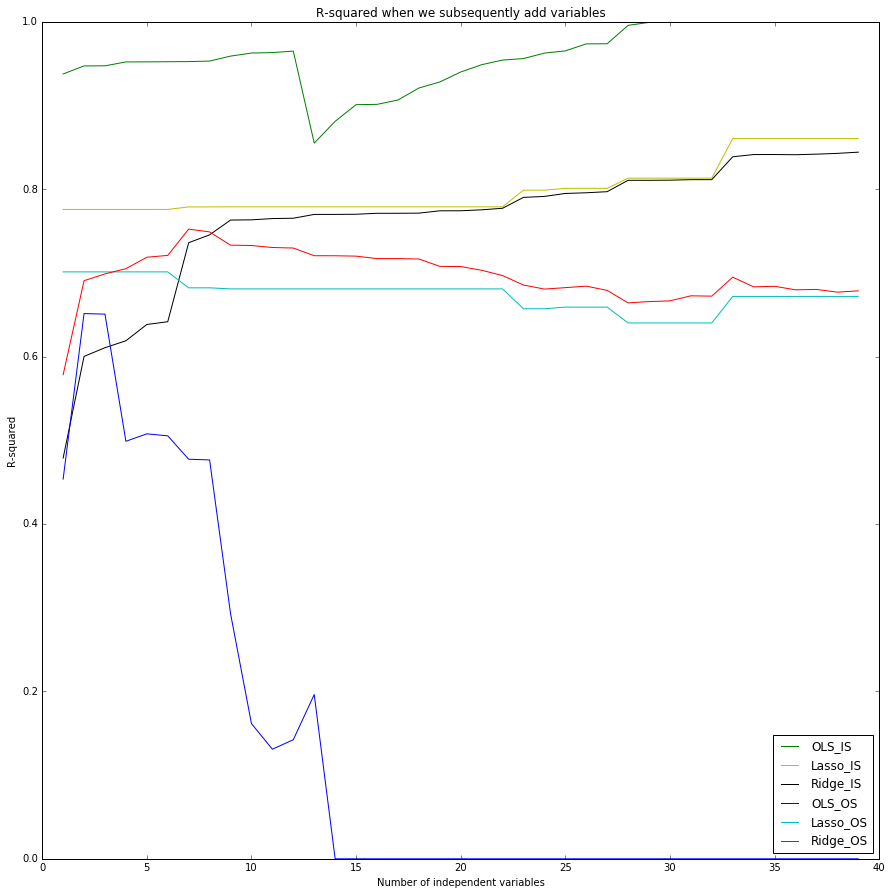

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

OLS_R_2_OS_F=[]
OLS_R_2_IS_F=[]
OLS_R_2_Ridge_OS_F=[]
OLS_R_2_Ridge_IS_F=[]
OLS_R_2_Lasso_OS_F=[]
OLS_R_2_Lasso_IS_F=[]

lambda_r_optimal = 40000
lambda_l_optimal = 40
Ridge=linear_model.Ridge(fit_intercept=True,alpha=lambda_r_optimal)
Lasso=linear_model.Lasso(fit_intercept=True, alpha=lambda_l_optimal)
Number_variables = range(1,40)

for j in Number_variables:
    # OLS
    lm = sm.OLS(y_train, X_train[:,:j]).fit()
    error = lm.predict(X_test[:,:j]) - y_test
    R_2_OS_OLS=1-error.var()/y_test.var()
    R_2_IS_OLS = lm.rsquared
    OLS_R_2_IS_F.append(R_2_IS_OLS)
    OLS_R_2_OS_F.append(max(R_2_OS_OLS,0))
    
    # Ridge
    Ridge.fit(X_train[:,:j],y_train)
    
    # In sample:
    err_IS=Ridge.predict(X_train[:,:j]) - y_train
    R_2_IS_Ridge=1-np.var(err_IS)/np.var(y_train)
    OLS_R_2_Ridge_IS_F.append(R_2_IS_Ridge)
    
    #Out of sample
    err_OS=Ridge.predict(X_test[:,:j]) - y_test
    R_2_OS_Ridge=1-np.var(err_OS)/np.var(y_test)
    OLS_R_2_Ridge_OS_F.append(max(R_2_OS_Ridge,0))

    # Lasso
    
    Lasso.fit(X_train[:,0:j],y_train)
    
    #In sample:
    p_IS=Lasso.predict(X_train[:,0:j])
    err_IS=p_IS-y_train
    R_2_IS_Lasso=1-np.var(err_IS)/np.var(y_train)
    OLS_R_2_Lasso_IS_F.append(R_2_IS_Lasso)

    #Out of sample
    p_OS=Lasso.predict(X_test[:,0:j])
    err_OS=p_OS-y_test
    R_2_OS_Lasso=1-np.var(err_OS)/np.var(y_test)
    OLS_R_2_Lasso_OS_F.append(max(R_2_OS_Lasso,0))


fig = plt.figure(figsize=(15,15))
plt.title('R-squared when we subsequently add variables')

plt.plot(Number_variables,OLS_R_2_IS_F,'g',label='OLS_IS')
plt.plot(Number_variables,OLS_R_2_Lasso_IS_F,'y',label='Lasso_IS')
plt.plot(Number_variables,OLS_R_2_Ridge_IS_F,'k',label='Ridge_IS')

plt.plot(Number_variables,OLS_R_2_OS_F,'b',label='OLS_OS')
plt.plot(Number_variables,OLS_R_2_Lasso_OS_F,'c',label='Lasso_OS')
plt.plot(Number_variables,OLS_R_2_Ridge_OS_F,'r',label='Ridge_OS')

plt.legend(loc='lower right')
plt.xlabel('Number of independent variables')
plt.ylabel('R-squared')
plt.show()

# Extracredit (25%)
Using a series of 10 random splits (cross-validation) of the training sample into approximately 60% training and 40% validation samples perform the selection of the optimal $\lambda$ for Ridge and Lasso regression: for each $\lambda$ of the considered sequence compute an average validation R2 for the 10 splits considered and finally select the $\lambda$ having the highest value for this average R2. Visualize the dependence of the said average cross-validation R2 over $\lambda$ for Lasso and Ridge. Report the R2 computed over the test set for the Lasso and Ridge trained over the entire training set with the selected optimal values of $\lambda$.

In [35]:
from sklearn.cross_validation import train_test_split

/Users/cuichenxi/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [36]:
def Regularization_fit_lambda(model,X_train,y_train, X_test, y_test, lambdas):
    #model = 1-Ridge, 2-Lasso
    #lambdas: a list of lambda values to try
    #p: ratio of the validation sample size / total training size
    #Graph: plot the graph of R^2 values for different lambda

    R_2_OS=[]
   
    if model==1:
        RM = lambda a: linear_model.Ridge(fit_intercept=0, alpha=a)
        model_label='Ridge'
    else:
        RM = lambda a: linear_model.Lasso(fit_intercept=0, alpha=a)
        model_label='Lasso'
    
    best_R2 = -1
    best_lambda = lambdas[0]
    best_test_R2 = 0
    for i in lambdas:
        R2_os=[]
        for j in range(10):
            X_train0, X_valid, y_train0, y_valid = train_test_split(X_train,
                                                        y_train, test_size = 0.4)
            lm = RM(i)
            lm.fit(X_train0,y_train0)  #fit the regularization model
            y_predict=lm.predict(X_valid) #compute the prediction for the validation sample 
            err_OS=y_predict-y_valid
            R_2_OS_=1-np.var(err_OS)/np.var(y_valid)
            R2_os.append(R_2_OS_)
        R_2_OS.append(np.array(R2_os).mean())
        if np.array(R2_os).mean() > best_R2:
            best_R2 =np.array(R2_os).mean()
            best_lambda = i
            best_test_R2 = RM(i).fit(X_train, y_train).score(X_test, y_test)
    fig = plt.figure(figsize=(10,10))
    plt.title('IS R-squared vs OS-R-squared for different Lambda')
    plt.xlabel('Lambda')
    l=lambdas
    bl=best_lambda
    plt.plot(l,R_2_OS,'b',label=model_label)
    plt.axvline(bl,color='r',linestyle='--')
    plt.legend(loc='best')
    plt.ylabel('R-squared')
    plt.ylim(0,1)
    plt.show()
    return best_lambda, best_test_R2

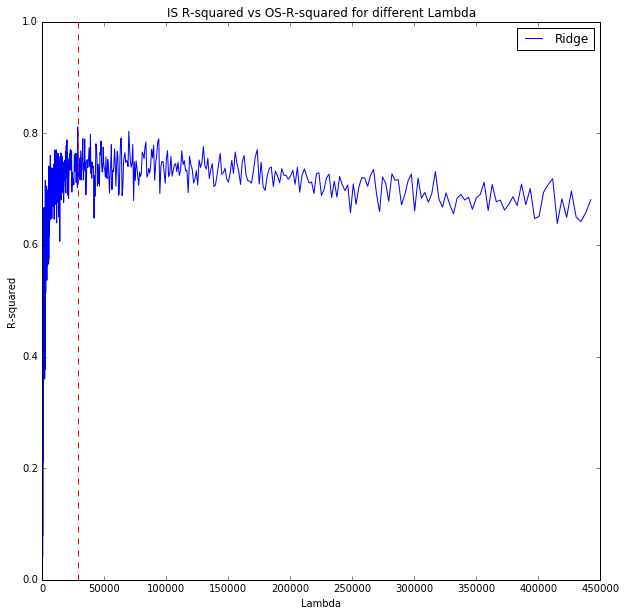

Optimal lambda for Ridge=28642.0534065
R-square for testset is 0.648460


In [37]:
lambdas = np.exp(np.linspace(-5,13,2000))
lambda_r_optimal, R2 = Regularization_fit_lambda(1,X_train,y_train, X_test, y_test, lambdas)
print('Optimal lambda for Ridge={0}'.format(lambda_r_optimal))
print("R-square for testset is %f" %R2)

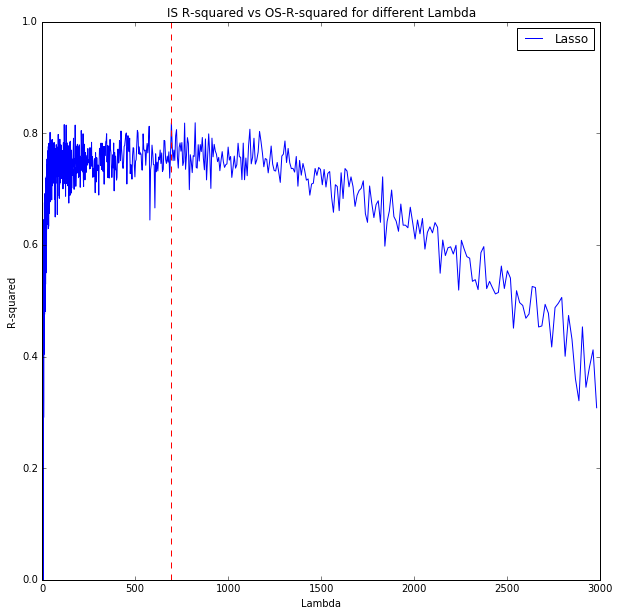

Optimal lambda for Lasso=694.555196625
R-square for testset is 0.564884


In [38]:
lambdas = np.exp(np.linspace(-5 ,8 ,2000))
lambda_r_optimal, R2 = Regularization_fit_lambda(2,X_train,y_train, X_test, y_test, lambdas)
print('Optimal lambda for Lasso={0}'.format(lambda_r_optimal))
print("R-square for testset is %f" %R2)

# Best of Luck!!